# Isolation Forest

**Este algoritmo es super robusto, ya que no necesita que los datos tengan distribuciones normales. Tampoco es un problema si nuestro conjunto de datos es grande, ya que es eficiente desde el punto de vista computacional.**

**Aislamiento es la palabra clave de este algoritmo debido a que aísla las anomalías del resto de las observaciones utilizando un conjunto de árboles. Este procedimiento de aislamiento separa todos los puntos de datos dividiendo aleatoriamente la región en partes más pequeñas. Identifica anomalías como las observaciones con longitudes de ruta promedio cortas en los árboles de aislamiento(puntuación de anomalía). Dado que el algoritmo Isolation Forest se basa en el principio de que las anomalías son observaciones escasas y diferentes, esto debería facilitar su identificación.**
* Se selecciona aleatoriamente un punto "a" para aislarlo.
* Se selecciona un punto de datos aleatorio "b" que esté entre el valor mínimo y el máximo y sea diferente de "a".
* Si el valor de "b" es inferior al valor de "a", el valor de "b" se convierte en el nuevo límite inferior.
* Si el valor de "b" es mayor que el valor de "a", el valor de "b" se convierte en el nuevo límite superior.

**Este procedimiento se repite mientras haya puntos de datos distintos de "a" entre el límite superior y el inferior.**

**Un concepto importante en este método es el número de aislamiento. El número de aislamiento es el número de divisiones necesarias para aislar un punto de datos. Este número de divisiones se determina siguiendo los pasos previamente descritos**

<img src="Isolation11.jpg">

**Antes de continuar con el modelo hay que hablar un poco sobre sus hyperparámetros, Como mencione antes es un modelo similar a random forest por lo que constan de hyperparametros en común. El numero de estimadores, las muestras máximas y las características máximas. Pero el hyperparametro mas importante en este modelo es la contaminación.**

**La contaminación se refiere a la proporción esperada de valores atípicos en el conjunto de datos. Se utiliza en el ajuste para definir el umbral de las puntuaciones de las muestras y se establece entre 0 y 1.**

In [3]:
import pandas as pd
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from sklearn.ensemble import IsolationForest

In [10]:
iforest = IsolationForest(n_estimators=100, max_samples='auto', 
                          contamination='auto', max_features=4, 
                          bootstrap=False, n_jobs=-1, random_state=1)

In [11]:
df_iris = pd.read_csv("Iris.csv")
X = df_iris.drop(['Id', 'Species'], axis=1)
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
pred = iforest.fit_predict(X)
X['scores']=iforest.decision_function(X)
X['anomaly_label']=pred
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,scores,anomaly_label
0,5.1,3.5,1.4,0.2,0.091238,1
1,4.9,3.0,1.4,0.2,0.061452,1
2,4.7,3.2,1.3,0.2,0.045621,1
3,4.6,3.1,1.5,0.2,0.034028,1
4,5.0,3.6,1.4,0.2,0.081412,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.042338,1
146,6.3,2.5,5.0,1.9,0.031853,1
147,6.5,3.0,5.2,2.0,0.079236,1
148,6.2,3.4,5.4,2.3,0.003387,1


In [13]:
X[X.anomaly_label==-1]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,scores,anomaly_label
8,4.4,2.9,1.4,0.2,-0.012226,-1
12,4.8,3.0,1.4,0.1,-0.006835,-1
13,4.3,3.0,1.1,0.1,-0.123747,-1
14,5.8,4.0,1.2,0.2,-0.084520,-1
15,5.7,4.4,1.5,0.4,-0.093904,-1
18,5.7,3.8,1.7,0.3,-0.017857,-1
22,4.6,3.6,1.0,0.2,-0.068918,-1
24,4.8,3.4,1.9,0.2,-0.010076,-1
32,5.2,4.1,1.5,0.1,-0.058535,-1
33,5.5,4.2,1.4,0.2,-0.042829,-1


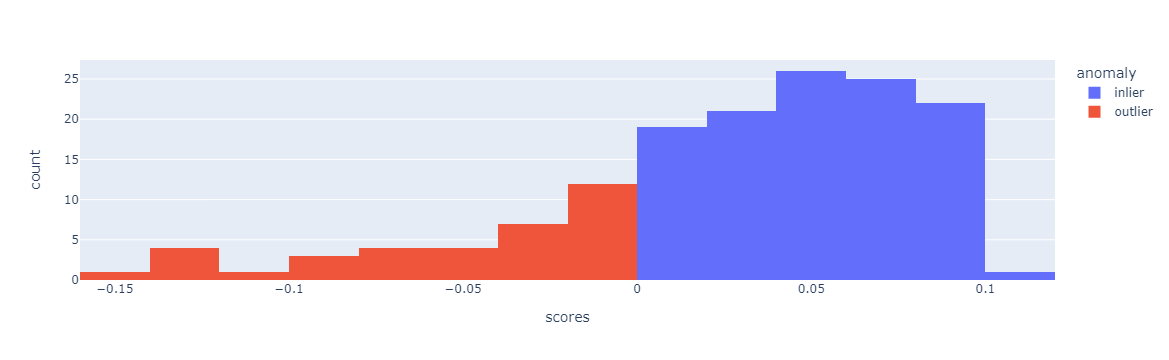

In [14]:
X['anomaly']=X['anomaly_label'].apply(lambda x: 'outlier' if x==-1  else 'inlier')
fig=px.histogram(X,x='scores',color='anomaly')
fig.show()

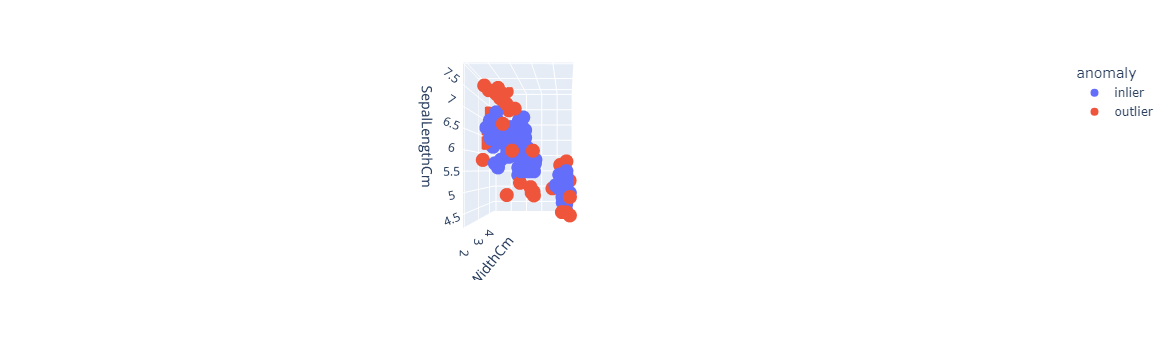

In [15]:
fig = px.scatter_3d(X,x='PetalWidthCm', y='SepalLengthCm', z='SepalWidthCm', color='anomaly')
fig.show()

- **Desventajas**
    - La puntuación de anomalía final depende del parámetro de contaminación. Esto implica que debemos tener una idea de qué porcentaje de los datos son anómalos de antemano para obtener una mejor predicción.
    -  El modelo sufre de un sesgo debido a la forma en que se produce la ramificación.

<img src="isolationsesgo2.png">

#### **Esto no sólo aumenta las posibilidades de falsos positivos, sino que también indica erróneamente una estructura inexistente en los datos.**

# DBSCAN (Clustering espacial basado en la densidad de aplicaciones con ruido)

**DBSCAN es un método de agrupación en clústeres que se utiliza en el aprendizaje automático para separar los clústeres de alta densidad de los clústeres de baja densidad. Dado que DBSCAN es un algoritmo de agrupamiento basado en la densidad, hace un excelente trabajo al buscar áreas en los datos que tienen una alta densidad de observaciones, en comparación con áreas de los datos que no son muy densas en observaciones (Ruido u Ouliers). DBSCAN también puede ordenar los datos en grupos de diferentes formas.**

### Hyperparametros y Funcionamiento

**DBSCAN requiere solo dos parámetros, epsilon y minPoints.** 
* Epsilon es el radio del círculo que se creará alrededor de cada punto de datos para verificar la densidad, Si un punto cae dentro de la distancia épsilon de otro punto, esos dos puntos estarán en el mismo grupo.
* minPoints es la cantidad mínima de puntos de datos necesarios dentro de ese círculo para que ese punto de datos se clasifique como un punto central. Si el número mínimo de puntos necesarios se establece en 4. Al pasar por cada punto de datos, siempre que DBSCAN encuentre 4 puntos dentro de una distancia épsilon entre sí, se forma un grupo.

**Usando estos dos parámetros, cada observación en el conjunto de datos se puede clasificar en una de las siguientes tres categorías:**
* Core point: Observación que tiene en su ϵ-vecino un número de observaciones vecinas igual o superior a min_samples.
* Border point: Observación que no satisface el número mínimo de observaciones vecinas para ser un punto central, pero pertenece a la zona de ϵ-de otra observación que es un punto central.
* Ruido o valor atípico: Observación que no es ni punto central ni punto fronterizo.

<img src="dbscan2.webp">

### Singularidades, ventajas y desventajas

**DBSCAN NO categoriza necesariamente todos los puntos de datos y, por lo tanto, es excelente para manejar valores atípicos en el conjunto de datos. Examinemos el siguiente gráfico:**

<img src="dbscan3.webp">

 **La imagen de la izquierda muestra un método de agrupamiento más tradicional que no tiene en cuenta la multidimensionalidad. Mientras que la imagen de la derecha muestra cómo DBSCAN puede distorsionar los datos en diferentes formas y dimensiones para encontrar grupos similares. También podemos notar  en la imagen de la derecha que los puntos a lo largo del borde exterior del conjunto de datos no están clasificados, lo que sugiere que son valores atípicos entre los datos.**

**Ventajas de DBSCAN:**
* Es excelente a la hora de separar conglomerados de alta densidad de conglomerados de baja densidad dentro de un conjunto de datos determinado.
* Puede identificar valores atípicos, por lo que los clústeres generados no están influenciados por ellos.
* A diferencia de modelos como K-means No requiere que el usuario especifique el número de clústeres.
* Los clusters no son obligatoriamente esféricos, pueden tomar cualquier forma y adaptarse al conjunto de datos.

**Desventajas de DBSCAN**
* Mientras que DBSCAN es excelente a la hora de separar los conglomerados de alta densidad de los de baja densidad, DBSCAN tiene dificultades con los conglomerados de densidad similar.
* Lucha con datos de alta dimensionalidad. Lo sé, dijimos que DBSCAN es excelente a la hora de deformar los datos en diferentes dimensiones y formas. Sin embargo, DBSCAN sólo puede ir hasta cierto punto, si se dan datos con demasiadas dimensiones, DBSCAN sufre.

**Antes de pasar a su implementacion tengo que mencionar la existencia de HDBSCAN. Esta variacion y la original son casi iguales, HDBSCAN incluye una mejora a DBSCAN y es que HDBSCAN calcula una función de densidad, para cada clustrer, por lo que los clusters pueden tener distinta densidad (en DBSCAN todos los cluster tienen la misma densidad). Si te interesa trabajar con HDBSCAN Aquí encontraras lo necesario https://github.com/scikit-learn-contrib/hdbscan.**

### Aplicación práctica del algoritmo

In [64]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import seaborn as sns

In [65]:
df = pd.read_csv('ccgeneral.csv')

In [71]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,PRC_FULL_PAYMENT,TENURE,MINIMUM_PAYMENTS_NEW,CREDIT_LIMIT_NEW
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,201.802084,0.000000,12,139.509787,1000.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,4103.032597,0.222222,12,1072.340217,7000.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,622.066742,0.000000,12,627.284787,7500.0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,0.000000,0.000000,12,312.343947,7500.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,678.334763,0.000000,12,244.791237,1200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,325.594462,0.500000,6,48.886365,1000.0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,275.861322,0.000000,6,312.343947,1000.0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,81.270775,0.250000,6,82.418369,1000.0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,52.549959,0.250000,6,55.755628,500.0


#### preparacion de los datos y construccion del modelo

In [55]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df,test_size=0.2,random_state=42)

In [56]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
train_df = mm.fit_transform(train_df)
test_df = mm.transform(test_df)

In [58]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
train_df = pt.fit_transform(train_df)
test_df = pt.transform(test_df)

#### Dbscan

In [59]:
from sklearn.cluster import DBSCAN

In [60]:
dbscan = DBSCAN(eps=2,min_samples=6)
dbscan.fit(train_df)
y_dbscan_pred = dbscan.labels_
y_dbscan_pred

array([ 1,  0,  0, ...,  0,  0, -1], dtype=int64)

In [61]:
dbscan_df = pd.DataFrame(train_df,columns = df.columns)
dbscan_df['clusters'] = y_dbscan_pred
dbscan_df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,PRC_FULL_PAYMENT,TENURE,MINIMUM_PAYMENTS_NEW,CREDIT_LIMIT_NEW,clusters
0,-0.937132,-1.267216,-0.029433,0.338526,-0.240386,-0.759264,0.759911,1.311241,0.943811,-0.879684,-0.811487,0.511013,-1.202855,-0.682927,-2.523257,-0.904943,-0.474651,1
1,1.291880,0.630684,-1.038959,-0.770843,-0.875991,-0.442225,-1.277682,-0.899467,-1.004129,0.119472,-0.225140,-1.112948,-0.282814,-0.682927,0.420804,1.573059,0.874702,0
2,-0.465038,0.630684,-1.038959,-0.770843,-0.875991,1.956628,-1.277682,-0.899467,-1.004129,1.843015,1.783117,-1.112948,1.755467,1.851019,0.420804,-0.374950,-1.328991,0
3,-1.148135,-1.698717,1.370433,-0.659492,1.955042,-0.759264,1.052468,-0.084946,1.183555,-0.879684,-0.811487,0.345413,0.663031,-0.682927,0.420804,-1.276909,-0.730514,0
4,1.388866,0.630684,-0.912679,-0.576602,-0.875991,1.679374,-1.014267,-0.084946,-1.004129,1.124381,1.300071,-0.952862,-0.204360,-0.682927,0.420804,1.252173,0.756250,0
5,-0.978519,-1.972925,-0.513848,-0.770843,0.153759,0.846675,1.220853,-0.899467,1.377708,0.119472,0.236861,0.345413,0.173675,-0.682927,0.420804,-0.971059,-1.199044,0
6,-1.132653,0.630684,-0.284999,-0.770843,0.522080,-0.759264,1.220853,-0.899467,1.235844,-0.879684,-0.811487,-0.042362,-0.973483,1.770979,-2.538000,-0.908083,-1.328991,1
7,0.784516,0.630684,1.955706,2.101295,1.192952,-0.759264,1.220853,1.672441,0.458988,-0.879684,-0.811487,1.077363,1.435215,-0.682927,0.420804,0.122970,0.982936,0
8,0.270674,0.630684,-1.002768,-0.714616,-0.875991,-0.759264,-1.014267,-0.084946,-1.004129,-0.879684,-0.811487,-0.952862,-0.991293,-0.682927,0.420804,-0.054464,-1.014119,0
9,-0.669240,-1.065671,0.219068,-0.005898,0.714638,-0.759264,0.878811,1.627952,1.070284,-0.879684,-0.811487,1.496932,0.593315,0.457313,0.420804,-0.591884,0.155435,0


In [62]:
dbscan_df = pd.DataFrame(train_df,columns = df.columns)
dbscan_df['clusters'] = y_dbscan_pred
dbscan_df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,PRC_FULL_PAYMENT,TENURE,MINIMUM_PAYMENTS_NEW,CREDIT_LIMIT_NEW,clusters
0,-0.937132,-1.267216,-0.029433,0.338526,-0.240386,-0.759264,0.759911,1.311241,0.943811,-0.879684,-0.811487,0.511013,-1.202855,-0.682927,-2.523257,-0.904943,-0.474651,1
1,1.291880,0.630684,-1.038959,-0.770843,-0.875991,-0.442225,-1.277682,-0.899467,-1.004129,0.119472,-0.225140,-1.112948,-0.282814,-0.682927,0.420804,1.573059,0.874702,0
2,-0.465038,0.630684,-1.038959,-0.770843,-0.875991,1.956628,-1.277682,-0.899467,-1.004129,1.843015,1.783117,-1.112948,1.755467,1.851019,0.420804,-0.374950,-1.328991,0
3,-1.148135,-1.698717,1.370433,-0.659492,1.955042,-0.759264,1.052468,-0.084946,1.183555,-0.879684,-0.811487,0.345413,0.663031,-0.682927,0.420804,-1.276909,-0.730514,0
4,1.388866,0.630684,-0.912679,-0.576602,-0.875991,1.679374,-1.014267,-0.084946,-1.004129,1.124381,1.300071,-0.952862,-0.204360,-0.682927,0.420804,1.252173,0.756250,0
5,-0.978519,-1.972925,-0.513848,-0.770843,0.153759,0.846675,1.220853,-0.899467,1.377708,0.119472,0.236861,0.345413,0.173675,-0.682927,0.420804,-0.971059,-1.199044,0
6,-1.132653,0.630684,-0.284999,-0.770843,0.522080,-0.759264,1.220853,-0.899467,1.235844,-0.879684,-0.811487,-0.042362,-0.973483,1.770979,-2.538000,-0.908083,-1.328991,1
7,0.784516,0.630684,1.955706,2.101295,1.192952,-0.759264,1.220853,1.672441,0.458988,-0.879684,-0.811487,1.077363,1.435215,-0.682927,0.420804,0.122970,0.982936,0
8,0.270674,0.630684,-1.002768,-0.714616,-0.875991,-0.759264,-1.014267,-0.084946,-1.004129,-0.879684,-0.811487,-0.952862,-0.991293,-0.682927,0.420804,-0.054464,-1.014119,0
9,-0.669240,-1.065671,0.219068,-0.005898,0.714638,-0.759264,0.878811,1.627952,1.070284,-0.879684,-0.811487,1.496932,0.593315,0.457313,0.420804,-0.591884,0.155435,0


In [63]:
dbscan_df['clusters'].value_counts()

 0    5904
 1     876
-1     361
 2       8
 4       6
 3       5
Name: clusters, dtype: int64

# Local Outlier Factor (LOF)

**El factor atípico local (LOF) mide la "desviación local de la densidad" de cada observación con respecto a sus vecinos. El LOF mide en qué medida la densidad de un punto de datos difiere de la densidad de sus k vecinos más cercanos mediante una relación entre la densidad local media de los k vecinos más cercanos y la densidad local del punto de datos. La densidad local de un punto de datos es simplemente la proximidad (o lejanía) media de sus k vecinos más próximos. La densidad local de cada punto de datos es diferente para cada punto, suponiendo una distribución no uniforme.**

**Una de las ventajas de LOF es que tiene en cuenta tanto las propiedades locales como las globales de un conjunto de datos. Los valores atípicos no se identifican en términos absolutos, sino en relación con su vecindario local. Funciona bien cuando hay distintos conglomerados de densidades diferentes en un conjunto de datos.
LOF es adecuado para conjuntos de datos de dimensiones moderadamente altas.**


### Ejemplos gráficos

<img src="lof1.webp">

**En el gráfico anterior, el conglomerado C1 contiene 400 puntos y el conglomerado C2 contiene 100 puntos. El conglomerado C2 es mucho más denso que el C1. Los puntos o1 y o2 son valores atípicos "locales". El punto o1 está bastante aislado del resto de puntos y es un valor atípico "obvio". El punto o2 también es un valor atípico local, porque aunque la distancia entre o2 y sus vecinos más cercanos es similar a las distancias entre los puntos del cluster C1, esta distancia es mucho mayor que las distancias entre los puntos del cercano cluster C2.**

<img src="lof2.webp">

**En el ejemplo anterior, los puntos de datos se representan como puntos negros. El tamaño del círculo rojo alrededor de cada punto indica la puntuación del valor atípico: un círculo más grande indica una puntuación más alta. El gráfico muestra que los puntos de datos que están más próximos entre sí tienen puntuaciones más bajas. Los puntos más alejados de sus vecinos tienen puntuaciones más altas.**

### En términos matemáticos 

**Como vemos el algoritmo tiene cuatro componentes diferentes que es muy importante entender.**

* Hiperparámetro k: determina el número de vecinos
* Reachability distance (RD):La distancia k se utiliza ahora para calcular la distancia de alcance. Esta medida de distancia es simplemente el máximo de la distancia de dos puntos y la distancia k del segundo punto. Básicamente, si el punto a está dentro de los k vecinos del punto b, la distancia-alcance(a,b) será la distancia-k de b. En caso contrario, será la distancia real de a y b. Se trata sólo de un "factor de suavizado". Para simplificar, consideremos que es la distancia habitual entre dos puntos. (Las métricas de distancias que podemos utilizar son las siguientes Euclidiana, Minkowski, Manhattan)
* Local reachability distance: La LRD es la inversa de la distancia de alcance media de O respecto a sus vecinos. Los valores bajos de LRD implican que el cuerpo de datos más cercano está lejos del punto O. La LRD de un punto se utiliza para compararla con la LRD media de sus K vecinos.
* Local Outlier Factor: El LOF de un punto indica la densidad de este punto en comparación con la densidad de sus vecinos. Si la densidad de un punto es mucho menor que las densidades de sus vecinos (LOF ≫1), el punto está lejos de las zonas densas y, por tanto, es un valor atípico.

### Aplicación práctica del algoritmo

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyod.utils.data import generate_data
contamination = 0.05 # poecentaje de outliers
n_train = 500       # numero de puntos de entrenamiento
n_test = 500        # numero de puntos de testeo
n_features = 6      # numero de caracteristicas
X_train, X_test, y_train, y_test = generate_data(
    n_train=n_train, 
    n_test=n_test, 
    n_features= n_features, 
    contamination=contamination, 
    random_state=123)

X_train_pd = pd.DataFrame(X_train)
X_train_pd.head()

,0,1,2,3,4,5
0,2.396090,2.092611,2.073392,1.988262,1.953473,2.450997
1,1.631040,1.746182,1.898050,2.380148,1.967332,1.858916
2,1.824683,2.131412,2.028829,1.703454,2.502966,2.119108
3,2.106098,2.165173,2.340826,2.170109,1.749139,1.678661
4,1.829647,1.775596,1.829438,2.054768,1.577190,1.594549


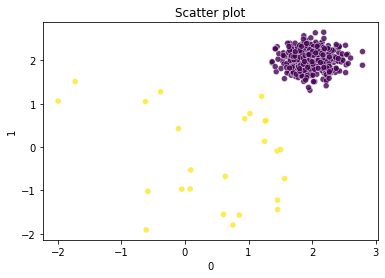

In [14]:
sns.scatterplot(X_train_pd[0], X_train_pd[1], c=y_train, alpha=0.8)
plt.title('Scatter plot')
plt.show()

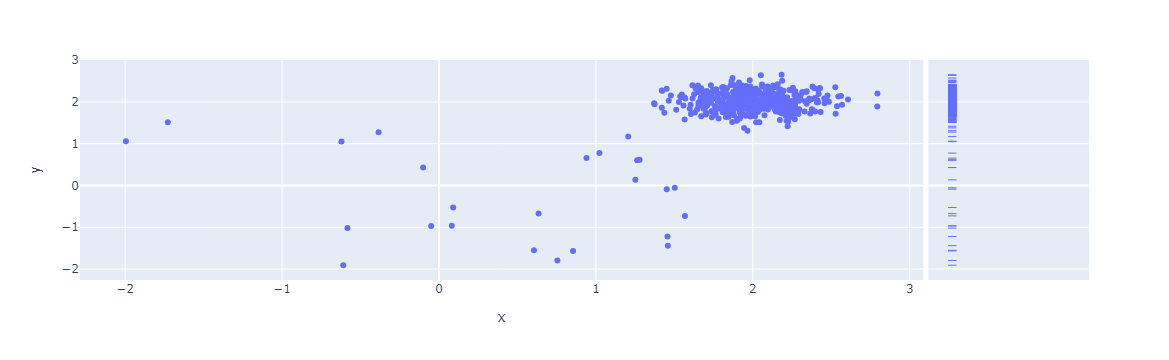

In [28]:
px.scatter(x = X_train_pd[0], y = X_train_pd[1], marginal_y="rug")

In [15]:
from pyod.models.lof import LOF
lof = LOF(contamination=0.05) 
lof.fit(X_train)

# Training data
y_train_scores = lof.decision_function(X_train)
y_train_pred = lof.predict(X_train)

# Test data
y_test_scores = lof.decision_function(X_test)
y_test_pred = lof.predict(X_test) # etiquetas de outliers (0 o 1)

def count_stat(vector):
    # Como son '0' y '1', podemos ejecutar una estadística de conteo. 
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("training data:", count_stat(y_train_pred))
print("test data:", count_stat(y_test_pred))
# Threshold para la tasa de contaminación definida:
print("threshold:" , lof.threshold_)

The training data: {0: 477, 1: 23}
The training data: {0: 472, 1: 28}
The threshold for the defined comtanimation rate: 1.321258785666126


In [16]:
lof.get_params()

{'algorithm': 'auto',
 'contamination': 0.05,
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 20,
 'novelty': True,
 'p': 2}

In [17]:
threshold = lof.threshold_ 

def descriptive_stat_threshold(df,pred_score, threshold):
    # Veamos cuántos '0 y' 1.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Ahora veamos las estadísticas resumidas:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # el avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(X_train,y_train_scores, threshold)

,Group,Count,Count %,0,1,2,3,4,5,Anomaly_Score
0,Normal,477,95.4,1.94,1.92,1.90,1.89,1.92,1.9,1.07
1,Outlier,23,4.6,1.58,1.46,1.53,1.71,1.54,1.5,1.77


In [18]:
Actual_pred = pd.DataFrame({'Actual': y_test, 'Anomaly_Score': y_test_scores})
Actual_pred['Pred'] = np.where(Actual_pred['Anomaly_Score']< threshold,0,1)
pd.crosstab(Actual_pred['Actual'],Actual_pred['Pred'])

Pred,0,1
Actual,,
0.0,455,20
1.0,17,8


In [72]:
# asdasdasdasd (*)